In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df.head()

/tmp/ipython-input-3-2054976732.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# Show duplicate rows
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
#drop unnecessary columns
df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [ ]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 1}

# Map the target variable
df['Credit_Score'] = df['Credit_Score'].map(target_mapping)

In [ ]:
df = df.replace("_", "", regex=True)

In [ ]:
df[df.eq('').any(axis=1)]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,4.0,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,1
8,28,,34847.84,2,4,6,1,3,4,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,1
10,28,Teacher,34847.84,2,1385,6,1,3,-1,2.0,,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,1
16,34,,143162.64,1,5,8,3,5,8,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,1
18,34,,143162.64,1,5,8,3,8,7,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,10000,HighspentSmallvaluepayments,715.741367403555,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,28,,20002.88,10,8,29,5,33,25,9.0,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.36660309585342,!@9#%8,307.659291,1
99992,24,Mechanic,39628.99,4,6,7,2,23,NaN,3.0,,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,LowspentSmallvaluepayments,189.64108,0
99994,25,Mechanic,39628.99,4,6,7,2,20,6,3.0,,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,HighspentMediumvaluepayments,410.256158,0
99995,25,Mechanic,39628.99,4,6,7,2,23,7,3.0,,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,HighspentLargevaluepayments,479.866228,0


In [ ]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [ ]:
df.shape

(100000, 20)

In [ ]:
df.isnull().sum()

,0
Age,0
Occupation,7062
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965


In [ ]:
df.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
count,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000
mean,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217,0.710020
std,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270,0.453755
min,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.000000
25%,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660,0.000000
50%,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473,1.000000
75%,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249,1.000000
max,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000,1.000000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Age,100000,1728,38,2994
Occupation,92938,15,Lawyer,6575
Annual_Income,100000,13487,109945.32,16
Num_of_Loan,100000,414,3,15104
Num_of_Delayed_Payment,92998,711,19,5481
Credit_Mix,79805,3,Standard,36479
Outstanding_Debt,100000,12203,1360.45,24
Credit_History_Age,90970,404,15 Years and 11 Months,446
Payment_of_Min_Amount,100000,3,Yes,52326
Amount_invested_monthly,95521,91049,10000,4305


In [ ]:
#check not unique values
df.Age.nunique()

1728

In [ ]:
df.Age.value_counts(ascending=False).head(10)

,count
Age,
38,2994
28,2968
31,2955
26,2945
32,2884
36,2868
35,2866
25,2861
27,2859


In [ ]:
import re

def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'

    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)

    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]

    unique_non_numeric_values = set(non_numeric_values)

    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)

{'-'}


In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') #Converts the 'Age' column to numeric values (integers or floats).
df[df['Age'] < 0]['Age'].unique() #Filters the df to only show rows where Age <df.Occupation.value_counts() 0.

array([-500])

In [ ]:
df[df['Age'] > 100]['Age'].unique()

array([7580,  181,  995, ..., 4808, 2263, 1342])

In [ ]:
#drop age > 100 & < 0
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

Occupation

In [ ]:
df.Occupation.value_counts()

,count
Occupation,
Lawyer,6389
Architect,6175
Engineer,6172
Scientist,6113
Accountant,6110
Mechanic,6099
MediaManager,6068
Teacher,6049
Developer,6031


In [ ]:
df.Occupation.isnull().sum() #check nulls

np.int64(6873)

In [ ]:
df.loc[pd.isna(df['Occupation']), 'Occupation'] = 'Other'

Num_Bank_Accounts

In [ ]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [ ]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

np.int64(21)

In [ ]:
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)

Num_of_Loan

In [ ]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [ ]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100])

In [ ]:
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352, 1017,  945,  146,  563,  341,  720, 1485,
         49,  737, 1106,  466,  728,  313,  597,  119,  663,  640,   92,
       1019,  501, 1302,   39,  716,  848,  931, 1214,  186,  424, 1001,
       1110, 1152,  457, 1433, 1187,   52, 1480, 1047, 1035, 1347,   33,
        193,  699,  329, 1451,  484,  649,  995,  545,  684, 1135, 1094,
       1204,  654,   58,  348,  614, 1363,  323, 1406, 1348,  430,  153,
       1461,  905, 1312, 1424, 1154,   95, 1353, 1228,  819, 1006,  795,
        359, 1209,  590,  696, 1185, 1465,  911,   70,  816, 1369,  143,
       1416,  455,   55, 1096, 1474,  420,  904,   89, 1259,  527, 1241,
        449,  983,  418,  319,   23,  238,  638,  138,  235,  280, 1070,
       1484,  274,  494, 1459,  404, 1354, 1495, 1391,  601, 1313, 1319,
        898,  231,  752,  174,  961, 1046,  834,  284,  438,  288, 1463,
       1151,  719,  198, 1015,  855,  841,  392, 14

In [ ]:
df[df['Num_of_Loan'] < 0 ]['Num_of_Loan'].count()

np.int64(3770)

In [ ]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace = True)

In [ ]:
df.shape

(93433, 20)

Delay_from_due_date

In [ ]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [ ]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()

array([-1, -2, -3, -5, -4])

In [ ]:
df['Delay_from_due_date'].nunique()

73

In [ ]:
df[df['Delay_from_due_date'] < 0 ]['Delay_from_due_date'].count()

np.int64(547)

In [ ]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
df.shape

(92886, 20)

Num_of_Delayed_Payment

In [ ]:
non_numeric_values(df, 'Num_of_Delayed_Payment')

{'-', 'nan'}

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [ ]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

np.int64(592)

In [ ]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.shape

(92294, 20)

In [ ]:
df['Num_of_Delayed_Payment'].value_counts().head(10)

,count
Num_of_Delayed_Payment,
17.0,5080
19.0,5065
16.0,4951
10.0,4941
15.0,4888
18.0,4876
20.0,4761
12.0,4717
9.0,4617


In [ ]:
df['Num_of_Delayed_Payment'].isnull().sum()

np.int64(6490)

KNN impute

In [ ]:
from sklearn.impute import KNNImputer
def knn_impute_column(df, column_name, n_neighbors=5):
  column_to_impute = df[[column_name]]
  imputer = KNNImputer(n_neighbors=n_neighbors)
  column_imputed = imputer.fit_transform(column_to_impute)
  df[column_name] = column_imputed

  return df


In [ ]:
df = knn_impute_column (df, 'Num_of_Delayed_Payment')

In [ ]:
df['Num_of_Delayed_Payment'].isnull().sum()

np.int64(0)

Num_Credit_Inquiries

In [ ]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [ ]:
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

In [ ]:
df['Num_Credit_Inquiries'].isnull().sum()

np.int64(1810)

In [ ]:
df['Num_Credit_Inquiries'].nunique()

1160

In [ ]:
df['Num_Credit_Inquiries'].value_counts().head(10)

,count
Num_Credit_Inquiries,
4.0,10314
3.0,8103
6.0,7560
7.0,7516
8.0,7311
2.0,7290
1.0,6889
0.0,6364
5.0,5277


In [ ]:
df = knn_impute_column(df, 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'].isnull().sum()

np.int64(0)

Credit Mix

In [ ]:
df.Credit_Mix.value_counts()

,count
Credit_Mix,
Standard,34131
Good,21741
Bad,17755


In [ ]:
df.Credit_Mix.isnull().sum()

np.int64(18667)

In [ ]:
df['Credit_Mix'].fillna('Unknown', inplace=True)

/tmp/ipython-input-55-3550361099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Mix'].fillna('Unknown', inplace=True)


In [ ]:
df['Credit_Mix'].astype('object')

,Credit_Mix
0,Unknown
3,Good
4,Good
5,Good
6,Good
...,...
99995,Unknown
99996,Unknown
99997,Good
99998,Good


In [ ]:
df.Credit_Mix.value_counts()

,count
Credit_Mix,
Standard,34131
Good,21741
Unknown,18667
Bad,17755


Credit_History_Age

In [ ]:
df.Credit_History_Age.value_counts()

,count
Credit_History_Age,
15 Years and 11 Months,414
19 Years and 5 Months,408
19 Years and 3 Months,407
17 Years and 9 Months,407
19 Years and 4 Months,406
...,...
0 Years and 3 Months,19
33 Years and 7 Months,14
0 Years and 2 Months,13


In [ ]:
df.Credit_History_Age.isnull().sum()

np.int64(8356)

In [ ]:
df.Credit_History_Age.value_counts()

,count
Credit_History_Age,
15 Years and 11 Months,414
19 Years and 5 Months,408
19 Years and 3 Months,407
17 Years and 9 Months,407
19 Years and 4 Months,406
...,...
0 Years and 3 Months,19
33 Years and 7 Months,14
0 Years and 2 Months,13


In [ ]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

/tmp/ipython-input-61-175112329.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [ ]:
df.Credit_History_Age.isnull().sum()

np.int64(0)

In [ ]:
df.Credit_History_Age.value_counts()

,count
Credit_History_Age,
19 Years and 5 Months,3525
30 Years and 2 Months,2203
15 Years and 9 Months,2102
8 Years and 10 Months,1828
15 Years and 11 Months,414
...,...
0 Years and 3 Months,19
33 Years and 7 Months,14
0 Years and 2 Months,13


In [ ]:
# Extract years and months from 'Credit_History_Age' column
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000000,4.0,...,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,1,22,1
3,23,Scientist,19114.12,3,4,3,4,5,4.000000,4.0,...,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,1,22,4
4,23,Scientist,19114.12,3,4,3,4,6,31.202764,4.0,...,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,1,22,5
5,23,Scientist,19114.12,3,4,3,4,8,4.000000,4.0,...,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,1,22,6
6,23,Scientist,19114.12,3,4,3,4,3,8.000000,4.0,...,809.98,22.537593,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,1,22,7


In [ ]:
# Convert years to months and add with months to get total months
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000000,4.0,Unknown,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,1,265
3,23,Scientist,19114.12,3,4,3,4,5,4.000000,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,1,268
4,23,Scientist,19114.12,3,4,3,4,6,31.202764,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,1,269
5,23,Scientist,19114.12,3,4,3,4,8,4.000000,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,1,270
6,23,Scientist,19114.12,3,4,3,4,3,8.000000,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,1,271


Payment of Min Amount

In [ ]:
df.Payment_of_Min_Amount.value_counts()

,count
Payment_of_Min_Amount,
Yes,48966
No,32262
NM,11066


In [ ]:
df.Amount_invested_monthly.nunique()

84073

In [ ]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [ ]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()

array([], dtype=float64)

In [ ]:
df.Amount_invested_monthly.value_counts().head(15)

,count
Amount_invested_monthly,
10000.000000,3941
0.000000,154
96.326550,1
157.643452,1
89.570291,1
51.802287,1
98.026252,1
82.080521,1
145.015755,1


In [ ]:
df[df.Amount_invested_monthly.isna()].sample(10)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
22261,37,MediaManager,67097.28,3,3,11,4,19,14.0,4.0,Standard,1138.96,27.936171,Yes,417.495569,NaN,HighspentSmallvaluepayments,243.82222161901538,1,274
14874,23,Writer,16674.26,6,6,6,4,8,23.0,13.0,Unknown,2187.49,35.641121,Yes,29.620106,NaN,HighspentSmallvaluepayments,314.06248027008536,0,213
35137,21,Lawyer,125943.63,3,5,6,1,3,7.0,1.0,Good,853.94,38.578502,No,90.829353,NaN,HighspentMediumvaluepayments,1028.9834264160252,1,278
88015,19,Accountant,60174.93000000001,9,8,26,5,29,19.0,11.0,Bad,3015.47,26.080525,Yes,135.894440,NaN,HighspentLargevaluepayments,507.47024815640566,0,11
64666,14,Manager,19556.16,7,7,33,5,34,16.0,9.0,Unknown,2850.96,23.618924,Yes,65.797370,NaN,HighspentMediumvaluepayments,307.2892978204384,1,58
26259,14,Other,8435.625,7,6,16,4,25,16.0,10.0,Standard,1559.69,27.625404,NM,9971.000000,NaN,LowspentMediumvaluepayments,293.1498578979811,1,108
85558,25,Architect,9012.04,10,9,24,9,28,22.0,11.0,Unknown,2965.08,36.816136,Yes,35.495620,NaN,!@9#%8,285.2177712086009,0,109
40276,35,Doctor,17650562.0,4,3,18,2,25,15.0,5.0,Unknown,1651.16,25.321394,Yes,8.693717,NaN,LowspentLargevaluepayments,289.3304498391895,1,207
61628,44,MediaManager,35911.33,3,3,2,2,13,16.0,3.0,Standard,739.82,32.372906,No,39.112882,NaN,LowspentMediumvaluepayments,349.0461599445815,1,217
24603,33,Teacher,28108.17,3,4,18,4,30,12.0,7.0,Standard,597.44,24.374148,Yes,57.181988,NaN,HighspentMediumvaluepayments,409.77159202952134,1,176


In [ ]:
df = knn_impute_column(df, 'Amount_invested_monthly')

In [ ]:
df.Amount_invested_monthly.isnull().sum()

np.int64(0)

In [ ]:
df.Amount_invested_monthly.value_counts().head(10)

,count
Amount_invested_monthly,
633.430131,4128
10000.000000,3941
0.000000,154
157.643452,1
89.570291,1
51.802287,1
98.026252,1
82.080521,1
145.015755,1


In [ ]:
df[df['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()

np.int64(3941)

Payment Behavior

In [ ]:
df.Payment_Behaviour.value_counts()

,count
Payment_Behaviour,
LowspentSmallvaluepayments,23661
HighspentMediumvaluepayments,16179
LowspentMediumvaluepayments,12777
HighspentLargevaluepayments,12569
HighspentSmallvaluepayments,10468
LowspentLargevaluepayments,9646
!@9#%8,6994


In [ ]:
#replace !@9#%8 with NaN
df['Payment_Behaviour'].replace('!@9#%8' , pd.NA, inplace=True)

#fill missing value with mode
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)

/tmp/ipython-input-77-1392661737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment_Behaviour'].replace('!@9#%8' , pd.NA, inplace=True)
/tmp/ipython-input-77-1392661737.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
df.Payment_Behaviour.value_counts()

,count
Payment_Behaviour,
LowspentSmallvaluepayments,30655
HighspentMediumvaluepayments,16179
LowspentMediumvaluepayments,12777
HighspentLargevaluepayments,12569
HighspentSmallvaluepayments,10468
LowspentLargevaluepayments,9646


Monthly Balance

In [ ]:
df.Monthly_Balance.isnull().sum()

np.int64(1123)

In [ ]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [ ]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()

np.int64(9)

In [ ]:
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [ ]:
df['Monthly_Balance'].value_counts().head(15)

,count
Monthly_Balance,
393.673696,1
312.494089,1
223.451310,1
341.489231,1
340.479212,1
244.565317,1
358.124168,1
470.690627,1
484.591214,1


In [ ]:
df['Monthly_Balance'].max()

1602.0405189622518

In [ ]:
df['Monthly_Balance'].min()

0.0077596647753352

In [ ]:
df['Monthly_Balance'].mean()

np.float64(401.10228551214993)

In [ ]:
df = knn_impute_column(df, 'Monthly_Balance')
df.Monthly_Balance.isnull().sum()

np.int64(0)

In [ ]:
#change data types
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92285 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Num_Bank_Accounts          92285 non-null  int64  
 4   Num_Credit_Card            92285 non-null  int64  
 5   Interest_Rate              92285 non-null  int64  
 6   Num_of_Loan                92285 non-null  int64  
 7   Delay_from_due_date        92285 non-null  int64  
 8   Num_of_Delayed_Payment     92285 non-null  float64
 9   Num_Credit_Inquiries       92285 non-null  float64
 10  Credit_Mix                 92285 non-null  object 
 11  Outstanding_Debt           92285 non-null  float64
 12  Credit_Utilization_Ratio   92285 non-null  float64
 13  Payment_of_Min_Amount      92285 non-null  object 


In [ ]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000000,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,1,265
3,23,Scientist,19114.12,3,4,3,4,5,4.000000,4.0,Good,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,1,268
4,23,Scientist,19114.12,3,4,3,4,6,31.202764,4.0,Good,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,1,269
5,23,Scientist,19114.12,3,4,3,4,8,4.000000,4.0,Good,809.98,27.262259,No,49.574949,62.430172,LowspentSmallvaluepayments,340.479212,1,270
6,23,Scientist,19114.12,3,4,3,4,3,8.000000,4.0,Good,809.98,22.537593,No,49.574949,178.344067,LowspentSmallvaluepayments,244.565317,1,271


Feature Engineering

In [ ]:
df['Debt_to_Income'] = df['Outstanding_Debt'] / (df['Annual_Income'] + 1e-5)
df['Investment_to_Income'] = df['Amount_invested_monthly'] * 12 / (df['Annual_Income'] + 1e-5)
df['Loan_Account_Ratio'] = df['Num_of_Loan'] / (df['Num_Bank_Accounts'] + 1)
df['Account_Activity_Index'] = df['Num_of_Loan'] + df['Num_Credit_Card'] + df['Num_Bank_Accounts']

In [ ]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Debt_to_Income,Investment_to_Income,Loan_Account_Ratio,Account_Activity_Index
0,23,Scientist,19114.12,3,4,3,4,3,7.000000,4.0,...,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,1,265,0.042376,0.050485,1.0,11
3,23,Scientist,19114.12,3,4,3,4,5,4.000000,4.0,...,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,1,268,0.042376,0.125221,1.0,11
4,23,Scientist,19114.12,3,4,3,4,6,31.202764,4.0,...,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,1,269,0.042376,0.026004,1.0,11
5,23,Scientist,19114.12,3,4,3,4,8,4.000000,4.0,...,49.574949,62.430172,LowspentSmallvaluepayments,340.479212,1,270,0.042376,0.039194,1.0,11
6,23,Scientist,19114.12,3,4,3,4,3,8.000000,4.0,...,49.574949,178.344067,LowspentSmallvaluepayments,244.565317,1,271,0.042376,0.111966,1.0,11


In [ ]:
df.tail()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Debt_to_Income,Investment_to_Income,Loan_Account_Ratio,Account_Activity_Index
99995,25,Mechanic,39628.99,4,6,7,2,23,7.000000,3.0,...,35.104023,60.971333,HighspentLargevaluepayments,479.866228,0,378,0.012677,0.018463,0.4,12
99996,25,Mechanic,39628.99,4,6,7,2,18,7.000000,3.0,...,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,0,379,0.012677,0.016408,0.4,12
99997,25,Mechanic,39628.99,4,6,5729,2,27,6.000000,3.0,...,35.104023,24.028477,HighspentLargevaluepayments,516.809083,0,380,0.012677,0.007276,0.4,12
99998,25,Mechanic,39628.99,4,6,7,2,20,31.202764,3.0,...,35.104023,251.672582,LowspentLargevaluepayments,319.164979,1,381,0.012677,0.076209,0.4,12
99999,25,Mechanic,39628.99,4,6,7,2,18,6.000000,3.0,...,35.104023,167.163865,LowspentSmallvaluepayments,393.673696,0,382,0.012677,0.050619,0.4,12


In [ ]:
df[df['Num_Credit_Card'] > 20]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Debt_to_Income,Investment_to_Income,Loan_Account_Ratio,Account_Activity_Index
40,31,Lawyer,73928.46,4,1288,8,0,12,10.0,2.0,...,15015.000000,98.674410,HighspentLargevaluepayments,740.196090,1,362,0.007415,0.016017,0.000000,1292
157,32,Other,19300.34,6,1029,17,5,51,17.0,8.0,...,49.572062,83.447449,LowspentLargevaluepayments,288.216656,0,223,0.125915,0.051884,0.714286,1040
163,41,Musician,19514.88,7,488,17,0,30,12.0,2.0,...,0.000000,45.388820,HighspentMediumvaluepayments,387.435180,0,234,0.045166,0.027910,0.000000,495
207,48,Entrepreneur,20787.69,8,1381,14,3,22,14.0,3.0,...,42.221993,21.745531,HighspentLargevaluepayments,375.963226,1,221,0.029566,0.012553,0.333333,1392
215,30,Writer,34290.12,9,898,25,7,52,9.0,13.0,...,185.111983,94.917216,HighspentSmallvaluepayments,249.721801,0,171,0.078355,0.033217,0.700000,914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99605,38,Writer,126514.72,8,1255,5,3,21,19.0,0.0,...,61447.000000,902.340388,LowspentSmallvaluepayments,109.816092,1,355,0.003718,0.085588,0.333333,1266
99615,32,Journalist,64901.37,3,232,20,0,19,18.0,3.0,...,0.000000,126.263036,HighspentLargevaluepayments,643.581714,1,377,0.006811,0.023346,0.000000,235
99619,30,Other,142560.36,6,1430,13,1,23,15.0,0.0,...,76.772094,982.946968,LowspentLargevaluepayments,387.583938,1,210,0.001548,0.082739,0.142857,1437
99769,23,Architect,60015.32,7,679,14,978,8,8.0,310.0,...,187.008683,241.313632,LowspentLargevaluepayments,353.805352,1,183,0.018248,0.048250,122.250000,1664


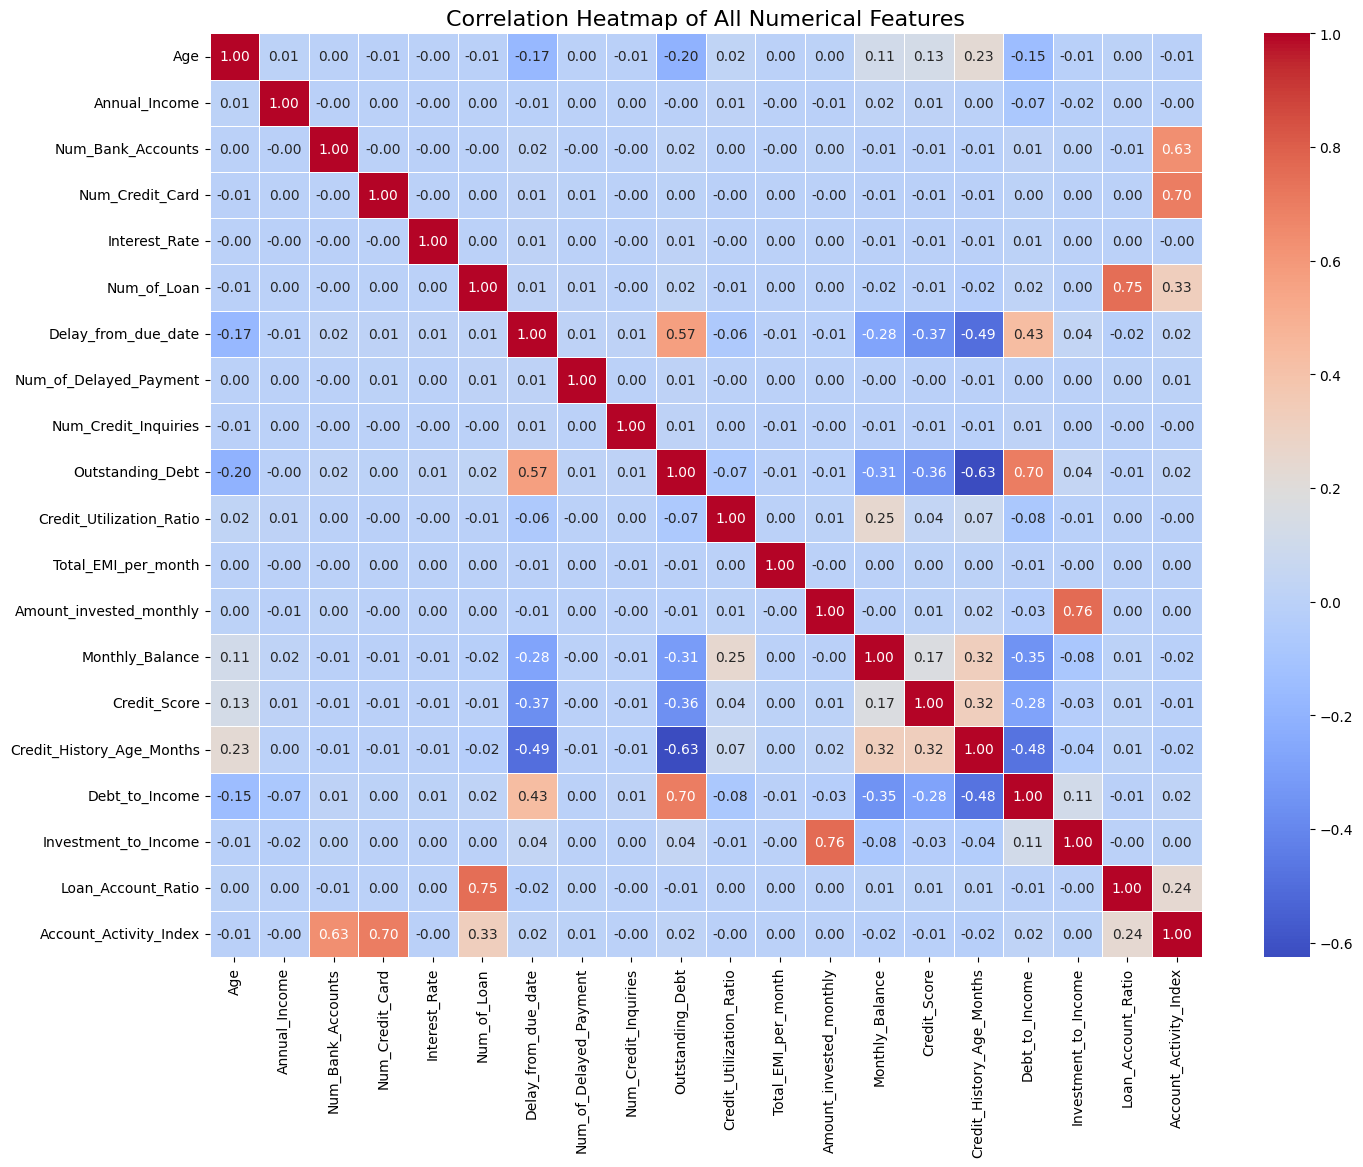

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot full heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Numerical Features", fontsize=16)
plt.show()


In [ ]:
df = df[df['Interest_Rate'] <= 50]

# Cap Loan Count
df = df[df['Num_of_Loan'] <= 15]

# Round and cap Delayed Payments
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].round().astype('Int64')
df = df[df['Num_of_Delayed_Payment'] <= 15]

# Round and cap Credit Inquiries
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].round().astype('Int64')
df = df[df['Num_Credit_Inquiries'] <= 10]

# Cap Number of Credit Cards
df = df[df['Num_Credit_Card'] <= 10]

# (Optional) Reset index after row removal
df.reset_index(drop=True, inplace=True)

/tmp/ipython-input-100-3399125796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].round().astype('Int64')


In [ ]:
df.to_csv('CS_Cleaned1.csv', index = False)